## Notebook del caso práctico


En este notebook se ejecutarán por separado algunas células independientes que apoyan al programa principal en forma de obtención de gráficas y soluciones iniciales.

Es importante tener en cuenta que para realizar la optimización debe iniciarse el script main.py, en este notebook no se optimizará nada.


In [84]:
import networkx as nx
from statsmodels.tsa.statespace.sarimax import SARIMAX
from data_processing import data_loader, separate_train_test

### Leer el CSV


In [95]:
# Importamos nuestro conjunto de datos sunsposts.csv
DATA_LOCATION = "./Electric_Production.csv"
N_TEST_CASES = 50  # Del enunciado 50

df = data_loader(DATA_LOCATION)
df_train, df_test = separate_train_test(df, N_TEST_CASES)
df_train.tail(10)

,IPG2211A2N
DATE,
2013-02-01,106.7340
2013-03-01,102.9948
2013-04-01,91.0092
2013-05-01,90.9634
2013-06-01,100.6957
2013-07-01,110.1480
2013-08-01,108.1756
2013-09-01,99.2809
2013-10-01,91.7871


### Graficar el CSV


<Axes: xlabel='DATE'>

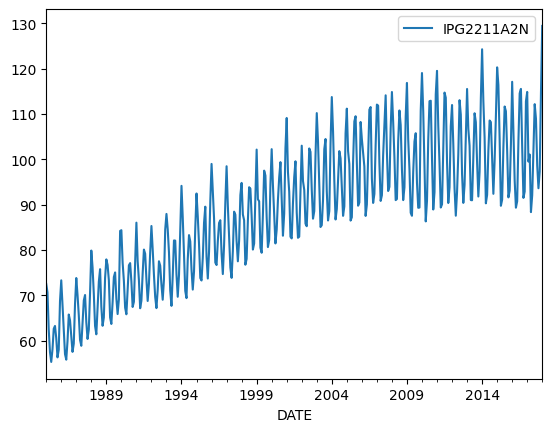

In [96]:
# Podemos hacer una visualización de nuestros datos
df.head(480).plot()

### Elección del nodo solución inicial


Obtención del nodo inicial basandose en la medida de cercanía de centralidad y coefs bajos


In [5]:
from networkx import closeness_centrality
from grafo import SolutionGraph, Coeficients

SEASONALITY_COEFICIENT = 12  # Del enunciado
MAX_COEFICIENTS = Coeficients(3, 2, 3, 3, 1, 3, SEASONALITY_COEFICIENT)  # Del enunciado
grafo = SolutionGraph(MAX_COEFICIENTS, SEASONALITY_COEFICIENT)

closeness = closeness_centrality(grafo.graph)
sorted_nodes = sorted(closeness.items(), key=lambda x: x[1], reverse=True)

print(sorted_nodes)

[((1, 2, 1, 1, 1, 1, 12), 0.2496570644718793), ((0, 2, 1, 1, 1, 1, 12), 0.23045267489711935), ((1, 2, 0, 1, 1, 1, 12), 0.23045267489711935), ((1, 1, 1, 1, 1, 1, 12), 0.23045267489711935), ((1, 2, 1, 0, 1, 1, 12), 0.23045267489711935), ((1, 2, 1, 1, 1, 0, 12), 0.23045267489711935), ((1, 2, 1, 1, 0, 1, 12), 0.23045267489711935), ((1, 2, 1, 1, 2, 1, 12), 0.23045267489711935), ((1, 2, 1, 1, 1, 2, 12), 0.23045267489711935), ((1, 2, 1, 2, 1, 1, 12), 0.23045267489711935), ((1, 3, 1, 1, 1, 1, 12), 0.23045267489711935), ((1, 2, 2, 1, 1, 1, 12), 0.23045267489711935), ((2, 2, 1, 1, 1, 1, 12), 0.23045267489711935), ((0, 2, 0, 1, 1, 1, 12), 0.2139917695473251), ((0, 1, 1, 1, 1, 1, 12), 0.2139917695473251), ((0, 2, 1, 0, 1, 1, 12), 0.2139917695473251), ((0, 2, 1, 1, 1, 0, 12), 0.2139917695473251), ((0, 2, 1, 1, 0, 1, 12), 0.2139917695473251), ((0, 2, 1, 1, 2, 1, 12), 0.2139917695473251), ((0, 2, 1, 1, 1, 2, 12), 0.2139917695473251), ((0, 2, 1, 2, 1, 1, 12), 0.2139917695473251), ((0, 3, 1, 1, 1, 1, 1

### Representación de la solución final


In [77]:
from modelo_sarima import SARIMAModel

In [97]:
BEST_COEFS = Coeficients(1, 1, 1, 0, 1, 4, 12)
best_model = SARIMAModel(df_train.IPG2211A2N, BEST_COEFS)

result_best_model = best_model.fit_model()
forecasted_values = result_best_model.get_forecast(steps=len(df_test))  # type: ignore

c:\Users\pablo\Documents\Master\Modulo_7\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\pablo\Documents\Master\Modulo_7\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [98]:
best_model.get_test_cost(df_test.IPG2211A2N)

c:\Users\pablo\Documents\Master\Modulo_7\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\pablo\Documents\Master\Modulo_7\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


3.4184328915838313

<Axes: >

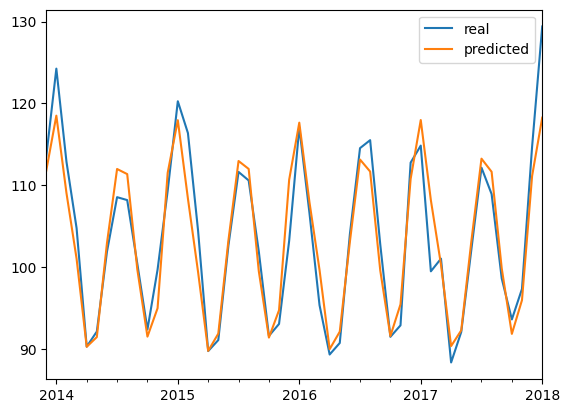

In [99]:
import pandas as pd

forecasting_data = pd.DataFrame(
    {"real": df_test.IPG2211A2N, "predicted": forecasted_values.predicted_mean}
)
forecasting_data.plot()